In [24]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import functools
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA

Text(0, 0.5, 'Suicide Count')

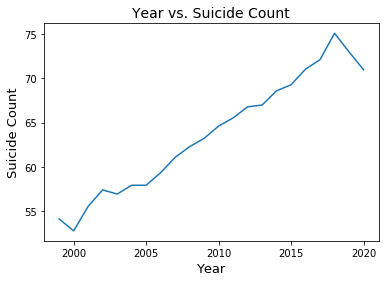

In [14]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
suicide.groupby('Year')['Deaths'].mean().plot()  #setup the title and labels of the figure.
plt.title("Year vs. Suicide Count",fontsize = 14) 
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)

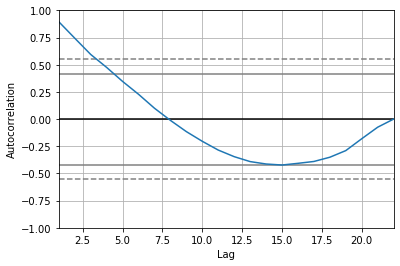

In [2]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
autocorr_plot = pd.plotting.autocorrelation_plot(suicide.groupby('Year')['Deaths'].mean())

In [5]:
suicide.head()
#suicide.info()

,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Year Code,Gender,Gender Code,Deaths,Population,Crude Rate
Year,,,,,,,,,,
2017,Alabama,1,5-14 years,2022-05-14 00:00:00,2017,Male,M,11,311004,Unreliable
2019,Alabama,1,5-14 years,2022-05-14 00:00:00,2019,Male,M,10,310145,Unreliable
1999,Alabama,1,15-24 years,15-24,1999,Female,F,13,316324,Unreliable
1999,Alabama,1,15-24 years,15-24,1999,Male,M,76,317647,23.9
2000,Alabama,1,15-24 years,15-24,2000,Male,M,63,316220,19.9


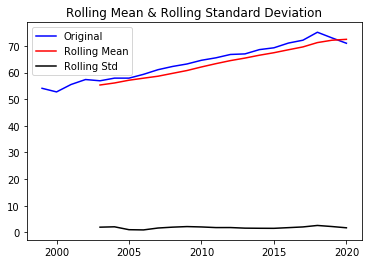

In [28]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=0)
series = suicide.groupby('Year')['Deaths'].mean()

rolling_mean = series.rolling(window=5).mean()
rolling_std = series.rolling(window=5).std()
plt.plot(series, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()
# rolling mean and rolling std increase with time, thus the time series is not stationary

In [8]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=0)
result = adfuller(suicide['Deaths'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
# The ADF Statistic is far from the critical values and the p-value is greater
# than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

ADF Statistic: -3.3075414646810577
p-value: 0.014544717949389545
Critical Values:
	1%: -3.4308685627010562
	5%: -2.86176917909594
	10%: -2.566891987053574


In [56]:
test_results = adfuller(suicide["Deaths"])

print(f"ADF test statistic: {test_results[0]}")
print(f"p-value: {test_results[1]}")
print("Critical thresholds:")

for key, value in test_results[4].items():
    print(f"\t{key}: {value}")

ADF test statistic: -3.3075414646810577
p-value: 0.014544717949389545
Critical thresholds:
	1%: -3.4308685627010562
	5%: -2.86176917909594
	10%: -2.566891987053574


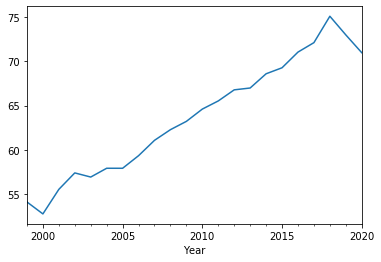

In [54]:
series = suicide.groupby('Year')['Deaths'].mean()
series.plot()

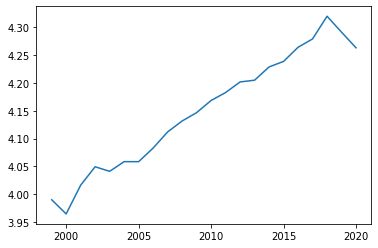

In [31]:
# Taking the log of the dependent variable is as simple way of lowering
# the rate at which rolling mean increases.
series_log = np.log(series)
plt.plot(series_log)

In [41]:
def get_stationarity(timeseries):
    # rolling statistics plot
    rolling_mean = timeseries.rolling(window=5).mean()
    rolling_std = timeseries.rolling(window=5).std()
    plt.plot(timeseries, color = 'blue', label = 'Original')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.show()
    # Dickey-Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    

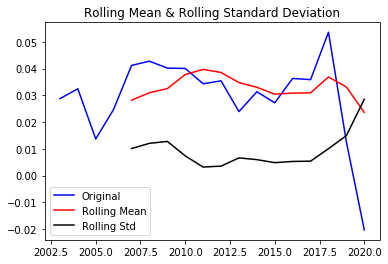

ADF Statistic: -1.3805098444426602
p-value: 0.5915834604444802
Critical Values:
	1%: -4.01203360058309
	5%: -3.1041838775510207
	10%: -2.6909873469387753


In [45]:
rolling_mean = series_log.rolling(window=5).mean()
series_log_minus_mean = series_log - rolling_mean 
series_log_minus_mean.dropna(inplace=True)
get_stationarity(series_log_minus_mean)

In [48]:
result = adfuller(series.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.212927
p-value: 0.996074


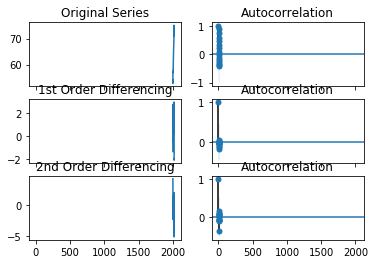

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(series); axes[0, 0].set_title('Original Series')
plot_acf(series, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(series.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(series.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(series.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(series.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [11]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
suicide.head()

,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Year Code,Gender,Gender Code,Deaths,Population,Crude Rate
Year,,,,,,,,,,
2017,Alabama,1,5-14 years,2022-05-14 00:00:00,2017,Male,M,11,311004,Unreliable
2019,Alabama,1,5-14 years,2022-05-14 00:00:00,2019,Male,M,10,310145,Unreliable
1999,Alabama,1,15-24 years,15-24,1999,Female,F,13,316324,Unreliable
1999,Alabama,1,15-24 years,15-24,1999,Male,M,76,317647,23.9
2000,Alabama,1,15-24 years,15-24,2000,Male,M,63,316220,19.9


In [26]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
series = suicide.groupby('Year')['Deaths'].mean()
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
model_fit.plot_predict(dynamic=False)

# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot.scatter()

# density plot of residuals
# residuals.plot(kind='kde')

# summary stats of residuals
# print(residuals.describe())

ValueError: not enough values to unpack (expected 3, got 1)

In [20]:
suicide = pd.read_excel('../data/cdc_suicide.xlsx', index_col=4)
series = suicide.groupby('Year')['Deaths'].mean()
print(series)

Year
1999    54.077821
2000    52.721805
2001    55.504744
2002    57.369318
2003    56.900000
2004    57.895911
2005    57.894640
2006    59.320370
2007    61.060329
2008    62.270125
2009    63.210247
2010    64.602431
2011    65.525597
2012    66.782095
2013    66.991625
2014    68.602965
2015    69.284566
2016    71.061588
2017    72.132812
2018    75.124204
2019    73.011006
2020    70.992089
Name: Deaths, dtype: float64
